In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_ratings = pd.read_csv("ratings.csv")
df_movies = pd.read_csv("movies.csv")

In [4]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [7]:
df_ratings = df_ratings.merge(df_movies[['movieId', 'title']],how='left', on='movieId')

In [8]:
df_ratings.groupby('rating').count()

,userId,movieId,timestamp,title
rating,,,,
0.5,1370,1370,1370,1370
1.0,2811,2811,2811,2811
1.5,1791,1791,1791,1791
2.0,7551,7551,7551,7551
2.5,5550,5550,5550,5550
3.0,20047,20047,20047,20047
3.5,13136,13136,13136,13136
4.0,26818,26818,26818,26818
4.5,8551,8551,8551,8551


/var/folders/71/qqyzx4rs5j18rp64d5trgtyh0000gn/T/ipykernel_5383/3006134898.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([num for num in ax.get_yticks()])


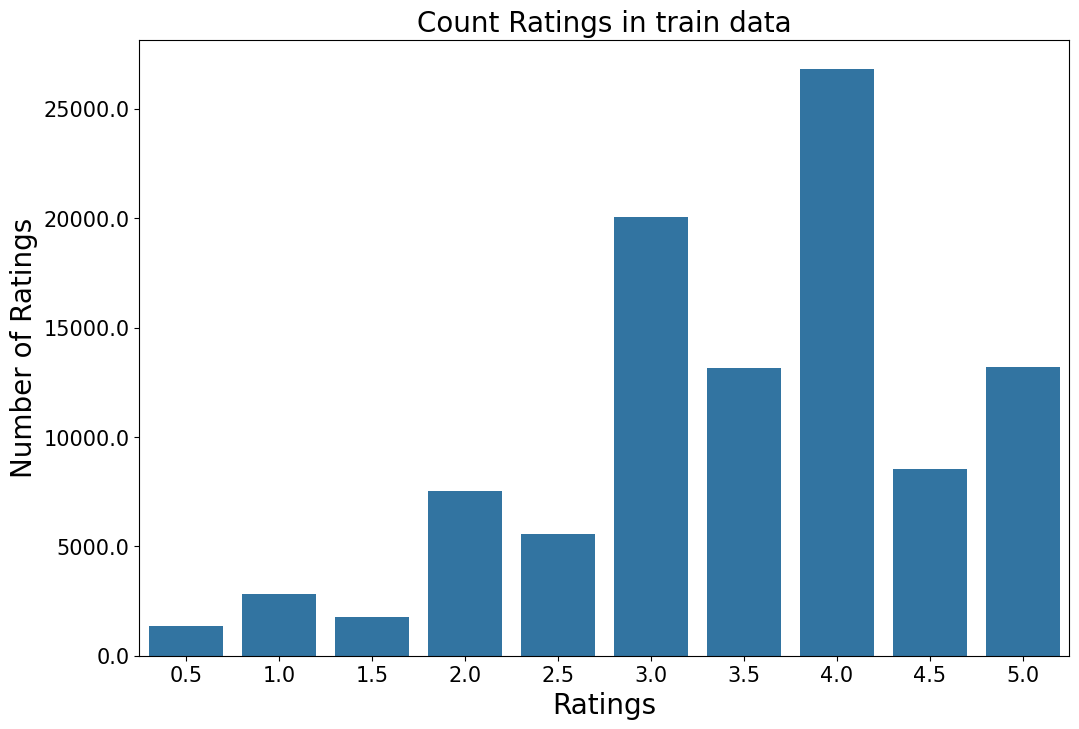

In [9]:
#df_ratings.hist(column='rating')
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="rating", data=df_ratings)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Count Ratings in train data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

In [10]:
df_ratings.groupby(by = "userId")["rating"].count().sort_values(ascending = False)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: rating, Length: 610, dtype: int64

In [11]:
df_ratings.groupby(by = "title")["rating"].count().sort_values(ascending = False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

In [12]:
df_user_item = df_ratings.pivot_table(index=['userId'], columns=['title'], values='rating')

In [28]:
df_user_item.tail(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,4.0,3.5,3.0,NaN,NaN,2.0,1.5,NaN,NaN


In [29]:
df_user_item.shape

(610, 9719)

In [30]:
from scipy import sparse

In [31]:
forrestGumpRatings = df_user_item['Forrest Gump (1994)']

In [32]:
forrestGumpRatings

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    4.0
607    NaN
608    3.0
609    4.0
610    3.0
Name: Forrest Gump (1994), Length: 610, dtype: float64

In [33]:
similarMovies = df_user_item.corrwith(forrestGumpRatings).dropna()

/Users/milanaleonova/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/milanaleonova/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [34]:
similarMovies

title
'burbs, The (1989)                0.197712
(500) Days of Summer (2009)       0.234095
*batteries not included (1987)    0.892710
...And Justice for All (1979)     0.928571
10 Cent Pistol (2015)            -1.000000
                                    ...   
[REC]² (2009)                    -0.052414
eXistenZ (1999)                   0.011189
xXx (2002)                        0.306817
xXx: State of the Union (2005)    0.383482
¡Three Amigos! (1986)             0.449692
Length: 5460, dtype: float64

In [35]:
similarMovies.sort_values(ascending=False)[:15]

title
Lost & Found (1999)                          1.0
Cercle Rouge, Le (Red Circle, The) (1970)    1.0
Play Time (a.k.a. Playtime) (1967)           1.0
Killers (2010)                               1.0
Playing God (1997)                           1.0
Girl Walks Home Alone at Night, A (2014)     1.0
Tampopo (1985)                               1.0
Century of the Self, The (2002)              1.0
Welcome to the Jungle (2013)                 1.0
Poison Ivy: New Seduction (1997)             1.0
Martha Marcy May Marlene (2011)              1.0
Take Shelter (2011)                          1.0
Chasers (1994)                               1.0
Tadpole (2002)                               1.0
Ghost Town (2008)                            1.0
dtype: float64

In [36]:
corr_matrix = df_user_item.corr(method='pearson', min_periods=100)

In [37]:
corr_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
user_ratings = df_user_item.loc[7].dropna()
user_ratings

title
2001: A Space Odyssey (1968)           4.0
A.I. Artificial Intelligence (2001)    4.5
Aladdin (1992)                         3.0
American Beauty (1999)                 4.0
Apocalypse Now (1979)                  4.0
                                      ... 
What Women Want (2000)                 4.0
Wild Wild West (1999)                  1.5
X-Men (2000)                           3.5
X-Men: The Last Stand (2006)           4.0
X2: X-Men United (2003)                4.0
Name: 7, Length: 152, dtype: float64

In [39]:
simCandidates = pd.Series()
for i in range(0, len(user_ratings.index)): 
    sims = corr_matrix[user_ratings.index[i]].dropna()
    sims = sims.map(lambda x: x * user_ratings[i])
    simCandidates = pd.concat([simCandidates, sims])
simCandidates.sort_values(inplace = True, ascending = False)

In [40]:
user_ratings.index[5]

'Apollo 13 (1995)'

In [41]:
corr_matrix[user_ratings.index[5]].dropna()

title
Ace Ventura: Pet Detective (1994)       0.096976
Aladdin (1992)                          0.321222
Apollo 13 (1995)                        1.000000
Batman (1989)                           0.075678
Braveheart (1995)                       0.232201
Dances with Wolves (1990)               0.252496
Forrest Gump (1994)                     0.186355
Fugitive, The (1993)                    0.355056
Independence Day (a.k.a. ID4) (1996)    0.302946
Jurassic Park (1993)                    0.309437
Lion King, The (1994)                   0.316054
Pulp Fiction (1994)                    -0.045333
Schindler's List (1993)                 0.330132
Seven (a.k.a. Se7en) (1995)             0.046390
Shawshank Redemption, The (1994)        0.102889
Silence of the Lambs, The (1991)        0.164643
Speed (1994)                            0.311971
Terminator 2: Judgment Day (1991)       0.399526
Toy Story (1995)                        0.191449
True Lies (1994)                        0.253759
Name: Apollo 1

In [42]:
user_ratings[5]

4.5

In [44]:
sims = corr_matrix[user_ratings.index[5]].dropna()

In [45]:
sims = sims.map(lambda x: x * user_ratings[5])

In [46]:
sims

title
Ace Ventura: Pet Detective (1994)       0.436391
Aladdin (1992)                          1.445498
Apollo 13 (1995)                        4.500000
Batman (1989)                           0.340552
Braveheart (1995)                       1.044904
Dances with Wolves (1990)               1.136230
Forrest Gump (1994)                     0.838598
Fugitive, The (1993)                    1.597750
Independence Day (a.k.a. ID4) (1996)    1.363258
Jurassic Park (1993)                    1.392467
Lion King, The (1994)                   1.422241
Pulp Fiction (1994)                    -0.203999
Schindler's List (1993)                 1.485596
Seven (a.k.a. Se7en) (1995)             0.208755
Shawshank Redemption, The (1994)        0.463001
Silence of the Lambs, The (1991)        0.740894
Speed (1994)                            1.403870
Terminator 2: Judgment Day (1991)       1.797867
Toy Story (1995)                        0.861521
True Lies (1994)                        1.141915
Name: Apollo 1

In [47]:
simCandidates

Silence of the Lambs, The (1991)             5.000000
Back to the Future (1985)                    5.000000
Terminator, The (1984)                       5.000000
Forrest Gump (1994)                          5.000000
Jurassic Park (1993)                         5.000000
                                               ...   
Pulp Fiction (1994)                         -0.376668
Pulp Fiction (1994)                         -0.431635
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   -0.474771
Pulp Fiction (1994)                         -0.719040
Fargo (1996)                                -0.801146
Length: 697, dtype: float64

In [49]:
simCandidates['Pulp Fiction (1994)']

Pulp Fiction (1994)    1.852650
Pulp Fiction (1994)    1.726410
Pulp Fiction (1994)    0.877422
Pulp Fiction (1994)    0.834369
Pulp Fiction (1994)    0.735865
Pulp Fiction (1994)    0.628044
Pulp Fiction (1994)    0.565586
Pulp Fiction (1994)    0.553853
Pulp Fiction (1994)    0.535964
Pulp Fiction (1994)    0.499873
Pulp Fiction (1994)    0.474061
Pulp Fiction (1994)    0.435248
Pulp Fiction (1994)    0.385003
Pulp Fiction (1994)    0.283283
Pulp Fiction (1994)    0.277542
Pulp Fiction (1994)    0.224734
Pulp Fiction (1994)    0.206554
Pulp Fiction (1994)    0.032662
Pulp Fiction (1994)   -0.040945
Pulp Fiction (1994)   -0.146387
Pulp Fiction (1994)   -0.203999
Pulp Fiction (1994)   -0.332219
Pulp Fiction (1994)   -0.376668
Pulp Fiction (1994)   -0.431635
Pulp Fiction (1994)   -0.719040
dtype: float64

In [50]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCandidates.sort_values(inplace = True, ascending = False)

In [51]:
simCandidates

Matrix, The (1999)                                       30.707095
Jurassic Park (1993)                                     28.078650
Star Wars: Episode IV - A New Hope (1977)                27.955474
Star Wars: Episode V - The Empire Strikes Back (1980)    27.739345
Terminator 2: Judgment Day (1991)                        27.421780
                                                           ...    
Dumb & Dumber (Dumb and Dumber) (1994)                    1.096868
Departed, The (2006)                                      1.000000
Babe (1995)                                               0.472172
Eternal Sunshine of the Spotless Mind (2004)              0.467916
Kill Bill: Vol. 1 (2003)                                 -0.046993
Length: 91, dtype: float64

In [52]:
intersection_set = set.intersection(set(simCandidates.index), set(user_ratings.index))
not_watched = list(set(simCandidates.index) - set(user_ratings.index))

In [53]:
print("Intersection: ", len(intersection_set))
print("Not watched: ", len(not_watched))

Intersection:  47
Not watched:  44


In [54]:
filteredSims = simCandidates[not_watched].sort_values(ascending = False)

In [55]:
filteredSims

Matrix, The (1999)                                                                30.707095
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    22.002139
Shawshank Redemption, The (1994)                                                  18.925514
Saving Private Ryan (1998)                                                        16.090221
Braveheart (1995)                                                                 14.532443
Men in Black (a.k.a. MIB) (1997)                                                  12.640371
Fight Club (1999)                                                                 12.045625
Lion King, The (1994)                                                             11.318720
Schindler's List (1993)                                                           11.235903
Speed (1994)                                                                      10.869473
Godfather, The (1972)                                                           